# P3 Let's be rational 
Until now, we've been looking at phases that have an exact t-bit binary expansion. In this node, we will analyze the performance of the QPE algorithm for phases that have a value that cannot be exactly represented using  bits, and see what happens when we increase the number of estimation wires. In the following exercise, we will define an estimation window. The estimation window is a tuple of the two most likely outcomes. We would expect the eigenphase (i.e., the phase angle , associated with the eigenvalue ) to be between the two values of the estimation window.

Author: [Monit Sharma](https://github.com/MonitSharma)
LinkedIn: [Monit Sharma](https://www.linkedin.com/in/monitsharma/)
Twitter: [@MonitSharma1729](https://twitter.com/MonitSharma1729)
Medium : [MonitSharma](https://medium.com/@_monitsharma)

### Codercise P.3.1
. Using the QPE algorithm, estimate the two most likely outcomes of the eigenphase of the eigenvector  of a unitary operator. The function qpe(unitary, estimation_wires, target_wires) is provided for you and returns a list of probabilities on the estimation wires. Since this involves testing your solution for a different number of estimation wires, please change the return value of the variable done to True when you are finished with testing.

In [ ]:
dev = qml.device("default.qubit", wires=10)

def fractional_binary_to_decimal(binary_fraction, wires):
    return float(binary_fraction/ 2 ** len(wires))

def phase_window(probs, estimation_wires):
    """ Given an array of probabilities, return the phase window of the 
    unitary's eigenvalue
    
    Args: 
        probs (array[float]): Probabilities on the estimation wires.
        estimation_wires (list[int]): List of estimation wires
    
    Returns:
        (float, float): the lower and upper bound of the phase
    """

    ##################
    # YOUR CODE HERE #
    ################## 
    #bound_1 = 0 # MOST LIKELY OUTCOME
    #bound_2 = 0 # SECOND MOST LIKELY OUTCOME
    arr = []
    increment = 2**-len(estimation_wires)
    for i in range(2**len(estimation_wires)):
        arr.append(i*increment)
    probs = [float(i) for i in probs]
    values = sorted(probs)
    bound_1 = arr[probs.index(values[-1])]
    bound_2 = arr[probs.index(values[-2])]
    return (bound_1, bound_2)


# Test your solution

# You can increase the number of estimation wires to a maximum of range(0, 9)
estimation_wires = range(0, 9)

# The target is set to the last qubit
target_wires = [9]

# Define the unitary
U = np.array([[1, 0], [0, np.exp((2*np.pi*1j/7))]])

probs = qpe(U, estimation_wires, target_wires)

print(phase_window(probs, estimation_wires))

# MODIFY TO TRUE AFTER TESTING YOUR SOLUTION
done = True


### Codercise P.3.2. 
On a device with 10 qubits, the last wire is set as the target wire and the first 9 wires are set as the estimation wires. Calculate the phase estimates starting at 1 to a maximum of 9 estimation wires. The qpe(unitary, estimation_wires, target_wires) and phase_window(probs, estimation_wires) functions have been defined for you and the target_wires have been prepared in the state 

In [ ]:
dev = qml.device("default.qubit", wires=10)

def estimates_array(unitary):
    """ Given a unitary, return a list of its phase windows
    
    Args: 
        unitary (array[complex]): A unitary matrix.
    
    Returns:
        [(float, float)]: a list of phase windows for 2 to 9 
        estimation wires
    """

    estimates = []
    target_wires = [9]

    ##################
    # YOUR CODE HERE #
    ################## 
    for i in range(1,9):
	    estimation_wires = [j for j in range(i+1)]
	    probs = qpe(unitary, estimation_wires, target_wires)
	    p = phase_window(probs, estimation_wires)
	    arr =[]
	    increment = 2**-len(estimation_wires)
	    for i in range(2**len(estimation_wires)):
		    arr.append(i*increment)
	    probs = [float(i) for i in probs]
	    values = sorted(probs)
	    bound_1 = arr[probs.index(values[-1])]
	    estimates.append(p)
    return estimates
    

# Define the unitary
U = np.array([[1, 0], [0, np.exp((2*np.pi*1j/7))]])

estimates_array(U)

###################
# SUBMIT FOR PLOT #
###################


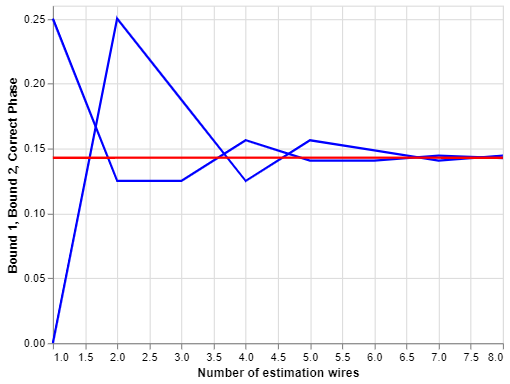